## Understanding QQ plots
https://data.library.virginia.edu/understanding-q-q-plots/

How to create a QQ plot in Desmos
https://www.desmos.com/calculator/d8xho6oobw

In [ ]:
import numpy as np
import math


1. Generate a sequence of 20 values that follows a normal distribution with $\mu=3$ and $\sigma=0.2$. These will represent our data.

*Hint: Use the function random.normal from numpy*

In [ ]:
mu, sigma =
data_normal =

3. Standardize the data and sort them in ascending order



In [ ]:
data_standard =
data_standard_sorted=

3. Create a numpy array of length 20 with numbers from 1 to 20


In [ ]:
i=

In [ ]:
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

4. Generate a sequence of percentages equally spaced used to calculate the quantiles

In [ ]:
P =

In [ ]:
P

array([0.025, 0.075, 0.125, 0.175, 0.225, 0.275, 0.325, 0.375, 0.425,
       0.475, 0.525, 0.575, 0.625, 0.675, 0.725, 0.775, 0.825, 0.875,
       0.925, 0.975])

5. Calculate the theoretical quantiles for the standard normal distribution (with scipy). The command ppf takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at (quantile).

The ppf is the inverse of cdf, which returns the cumulative distribution function (the probability)

In [ ]:
from scipy.stats import norm
theo_q=

6. Draw a scatter plot of empirical quantiles versus theoretical quantiles, and the line y=x.

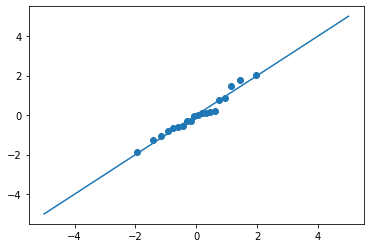

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard_sorted)
plt.show()

## Not normal data

Let's generate data with a skewed distribution (skewed right, with a long tail on the right)

In [ ]:
from scipy.stats import skewnorm
import math

skew = 6.0
mean = 0
stdev = 1

delta = skew / math.sqrt(1. + math.pow(skew, 2.))
adjStdev = math.sqrt(math.pow(stdev, 2.) / (1. - 2. * math.pow(delta, 2.) / math.pi))
adjMean = mean - adjStdev * math.sqrt(2. / math.pi) * delta
data_skewed = skewnorm.rvs(a = skew, loc=adjMean, scale=adjStdev, size=20)


data_skewed = np.sort(data_skewed)

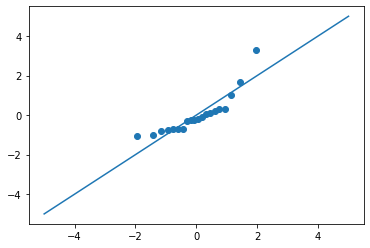

In [ ]:
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_skewed)
plt.show()

## Data with a t distribution with small dof

In [ ]:
data_t = np.random.standard_t(3, 20)
data_t = np.sort(data_t)

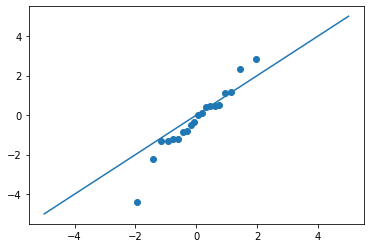

In [ ]:
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_t)
plt.show()

## Using statsmodels library

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


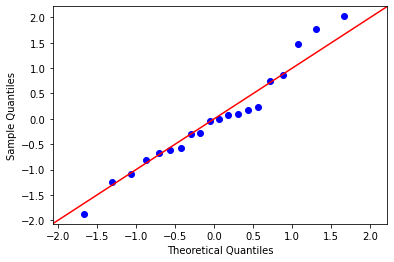

In [ ]:
import statsmodels.api as sm
sm.qqplot(data_standard, line='45')
plt.show()
